<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.227755,70.081866,51.285049,-0.021778,197.572892,197.614563,-0.041671
1,0.0,1.0,32.751792,27.137125,37.291557,-0.184497,106.995977,107.253415,-0.257438
2,0.0,2.0,26.363540,20.580504,64.145558,0.480115,121.569717,121.160853,0.408864
3,0.0,3.0,62.091388,33.789843,31.896033,-0.032749,137.744515,137.834749,-0.090234
4,0.0,4.0,64.134754,61.719094,29.215739,-0.015047,165.054540,165.104873,-0.050333
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.889977,52.713297,66.208731,-0.103148,154.708857,154.734357,-0.025499
59996,999.0,56.0,37.780046,88.873447,98.434729,0.115742,235.203964,235.023577,0.180387
59997,999.0,57.0,29.433812,48.739149,98.706567,-0.205524,186.674005,186.829437,-0.155432
59998,999.0,58.0,83.275326,57.931643,90.446073,0.088444,241.741485,241.710753,0.030732


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.227755,70.081866,51.285049,-0.021778,197.572892,197.614563,-0.041671
1,0.0,1.0,32.751792,27.137125,37.291557,-0.184497,106.995977,107.253415,-0.257438
2,0.0,2.0,26.363540,20.580504,64.145558,0.480115,121.569717,121.160853,0.408864
3,0.0,3.0,62.091388,33.789843,31.896033,-0.032749,137.744515,137.834749,-0.090234
4,0.0,4.0,64.134754,61.719094,29.215739,-0.015047,165.054540,165.104873,-0.050333
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.889977,52.713297,66.208731,-0.103148,154.708857,154.734357,-0.025499
59996,999.0,56.0,37.780046,88.873447,98.434729,0.115742,235.203964,235.023577,0.180387
59997,999.0,57.0,29.433812,48.739149,98.706567,-0.205524,186.674005,186.829437,-0.155432
59998,999.0,58.0,83.275326,57.931643,90.446073,0.088444,241.741485,241.710753,0.030732


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.227755  70.081866  51.285049  ...  197.572892  197.614563 -0.041671
      1.0    32.751792  27.137125  37.291557  ...  106.995977  107.253415 -0.257438
      2.0    26.363540  20.580504  64.145558  ...  121.569717  121.160853  0.408864
      3.0    62.091388  33.789843  31.896033  ...  137.744515  137.834749 -0.090234
      4.0    64.134754  61.719094  29.215739  ...  165.054540  165.104873 -0.050333
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.889977  52.713297  66.208731  ...  154.708857  154.734357 -0.025499
      56.0   37.780046  88.873447  98.434729  ...  235.203964  235.023577  0.180387
      57.0   29.433812  48.739149  98.706567  ...  186.674005  186.829437 -0.155432
      58.0   83.275326  57.931643  90.446073  ...  241.741485  241.710753  0.030732
      59.0   37.474968  83.730057  92.429418  ...  223.623047  223.570308  0.052738

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.227755  70.081866  51.285049  ...  197.572892  197.614563 -0.041671
      1.0    32.751792  27.137125  37.291557  ...  106.995977  107.253415 -0.257438
      2.0    26.363540  20.580504  64.145558  ...  121.569717  121.160853  0.408864
      3.0    62.091388  33.789843  31.896033  ...  137.744515  137.834749 -0.090234
      4.0    64.134754  61.719094  29.215739  ...  165.054540  165.104873 -0.050333
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.889977  52.713297  66.208731  ...  154.708857  154.734357 -0.025499
      56.0   37.780046  88.873447  98.434729  ...  235.203964  235.023577  0.180387
      57.0   29.433812  48.739149  98.706567  ...  186.674005  186.829437 -0.155432
      58.0   83.275326  57.931643  90.446073  ...  241.741485  241.710753  0.030732
      59.0   37.474968  83.730057  92.429418  ...  223.623047  223.570308  0.052738

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.227755,70.081866,51.285049,-0.021778,197.572892,197.614563,-0.041671
1,0.0,1.0,32.751792,27.137125,37.291557,-0.184497,106.995977,107.253415,-0.257438
2,0.0,2.0,26.363540,20.580504,64.145558,0.480115,121.569717,121.160853,0.408864
3,0.0,3.0,62.091388,33.789843,31.896033,-0.032749,137.744515,137.834749,-0.090234
4,0.0,4.0,64.134754,61.719094,29.215739,-0.015047,165.054540,165.104873,-0.050333
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.889977,52.713297,66.208731,-0.103148,154.708857,154.734357,-0.025499
59996,999.0,56.0,37.780046,88.873447,98.434729,0.115742,235.203964,235.023577,0.180387
59997,999.0,57.0,29.433812,48.739149,98.706567,-0.205524,186.674005,186.829437,-0.155432
59998,999.0,58.0,83.275326,57.931643,90.446073,0.088444,241.741485,241.710753,0.030732


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    66.227755  70.081866  51.285049  ...  197.572892  197.614563 -0.041671
      1.0    32.751792  27.137125  37.291557  ...  106.995977  107.253415 -0.257438
      2.0    26.363540  20.580504  64.145558  ...  121.569717  121.160853  0.408864
      3.0    62.091388  33.789843  31.896033  ...  137.744515  137.834749 -0.090234
      4.0    64.134754  61.719094  29.215739  ...  165.054540  165.104873 -0.050333
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.889977  52.713297  66.208731  ...  154.708857  154.734357 -0.025499
      56.0   37.780046  88.873447  98.434729  ...  235.203964  235.023577  0.180387
      57.0   29.433812  48.739149  98.706567  ...  186.674005  186.829437 -0.155432
      58.0   83.275326  57.931643  90.446073  ...  241.741485  241.710753  0.030732
      59.0   37.474968  83.730057  92.429418  ...  223.623047  223.570308  0.052738

[60000 rows x 7 columns]

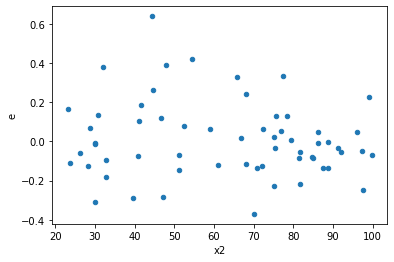

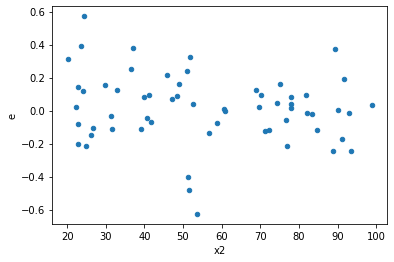

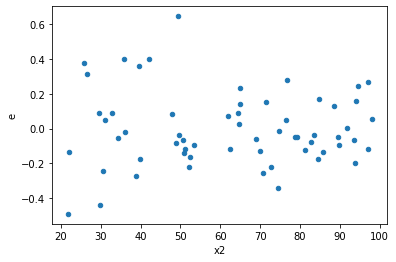

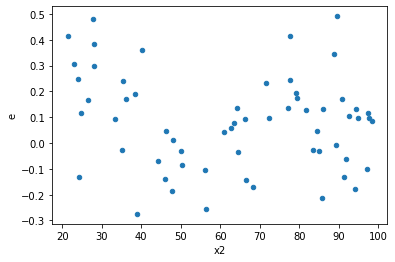

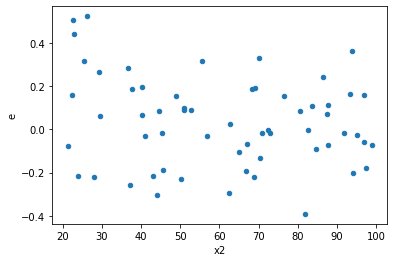

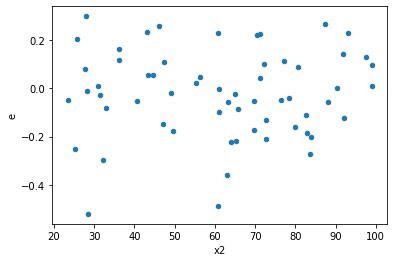

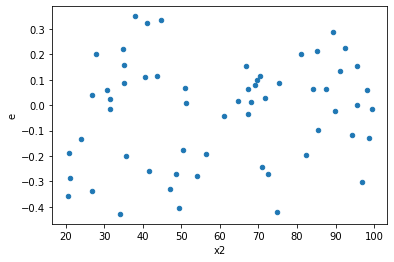

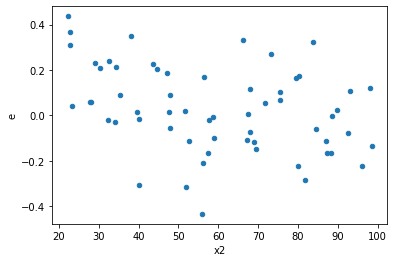

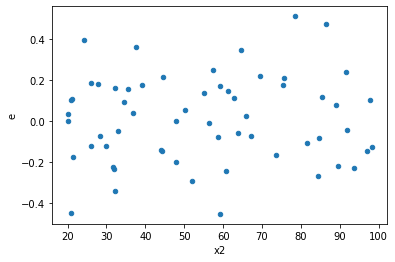

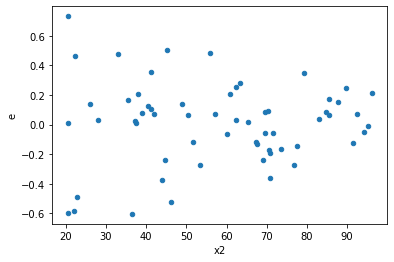

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
17.0,21.0,21.0,0.5862889304946861,0.5184977995629386,0.029314446524734306,0.02592488997814693,1.130745262542852,0.7809129971665818,0.6095435014167091,Reject005=1 : Homoscedasticity
38.0,21.0,21.0,0.8890837843264369,0.6447296864681358,0.04445418921632184,0.03223648432340679,1.3790023989695372,0.4677891493831918,0.7661054253084041,Reject005=1 : Homoscedasticity
40.0,21.0,21.0,0.7156946298474948,0.47956944824710357,0.03578473149237474,0.02397847241235518,1.492369108298002,0.36624179452771743,0.8168791027361413,Reject005=1 : Homoscedasticity
68.0,21.0,21.0,0.6188150801930914,0.5824707200913338,0.03094075400965457,0.029123536004566693,1.0623968876857168,0.8910030238449034,0.5544984880775483,Reject005=1 : Homoscedasticity
102.0,21.0,21.0,0.7278138317466876,0.5468326333368524,0.03639069158733438,0.02734163166684262,1.33096268835578,0.5181165022077359,0.7409417488961321,Reject005=1 : Homoscedasticity
112.0,21.0,21.0,1.1114221201365062,0.9835554768041148,0.05557110600682531,0.04917777384020574,1.13000450543763,0.7820511334271742,0.6089744332864129,Reject005=1 : Homoscedasticity
142.0,21.0,21.0,0.9272589981993893,0.5539236351329311,0.04636294990996946,0.027696181756646555,1.6739834507636866,0.24595043108978354,0.8770247844551082,Reject005=1 : Homoscedasticity
157.0,21.0,21.0,0.8611048230074423,0.5331524100869395,0.04305524115037211,0.026657620504346974,1.6151194418628336,0.27996393010632814,0.8600180349468359,Reject005=1 : Homoscedasticity
159.0,21.0,21.0,0.6193597410824022,0.5570418675633229,0.03096798705412011,0.027852093378166142,1.1118728719470898,0.8102902094440108,0.5948548952779946,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.7463741402065283,1.0966547551531503,0.03731870701032641,0.05483273775765751,0.6805917146662037,0.38506160794853567,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,0.4704151572466192,1.4452072786098409,0.02352075786233096,0.07226036393049204,0.32550013012605095,0.013149008565181093,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.2546392215268687,1.4482894509674165,0.012731961076343435,0.07241447254837083,0.17582066993360812,0.00019490554851681378,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.5805637419618932,1.2394930506213153,0.02902818709809466,0.061974652531065766,0.46838805725524363,0.08958532560407995,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,0.6209332446905427,1.4912769322866828,0.031046662234527133,0.07456384661433414,0.4163768856388202,0.050732064342736895,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,0.6467112984951462,0.9646200404320773,0.03233556492475731,0.048231002021603867,0.6704311245757119,0.36687318043366046,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,0.8949017114131256,1.2797292534722775,0.044745085570656276,0.06398646267361388,0.6992898763429819,0.41922988099873776,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,0.38501358406752184,1.3001658130093707,0.019250679203376093,0.06500829065046854,0.2961265249517424,0.007410764022668282,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.55498376921463,1.3350049619303135,0.0277491884607315,0.06675024809651567,0.4157166340506829,0.050327104564321934,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      681
Reject005=0 : Heteroscedasticity    319
Name: Result_test, dtype: int64